# HW3

## Neural Network
    Student Number : 32181995
    Name : 방동호

### 라이브러리 호출

In [45]:
import csv
import pylab as plt
import numpy as np

### Data 불러오기

In [46]:
x = []
x_list = []
y = []
y_list = []

f = open('hw3_data.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)

i = 0
for line in rdr:
    x.append([float(line[0])])
    x_list.append(float(line[0]))
    y.append([float(line[1])])
    y_list.append(float(line[1]))
    i += 1
f.close()

x = np.array(x).T
y = np.array(y).T

### Data 분포 확인

In [47]:
print("Number of x data: ", len(x_list), "Number of y data: ", len(y_list))
print("max(x):", max(x_list), "min(x):", min(x_list))
print("max(y):", max(y_list), "min(y):", min(y_list))

Number of x data:  5000 Number of y data:  5000
max(x): 49.9839286 min(x): -49.99516554
max(y): -4.785407023 min(y): -8.507007096


    그래프 확인

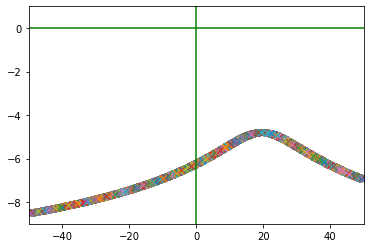

In [48]:
# 그래프 그리기
plt.plot(x,y,'x')
plt.xlim([-50,50]); plt.ylim([-9,1])
plt.axvline(x=0, c='g'); plt.axhline(y=0, c='g')
plt.show()

### Multi-Layer Perceptron Training

In [51]:
# 활성 함수
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def de_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def identity(x):
    return x

def de_identity(x):
    return 1

# Input 노드와 Output 노드의 수
inputNode = 5000
outputNode = 5000

# Hidden 노드의 수
hiddenNode = 100

# Hidden Weight
hiddenWeight = np.random.rand(inputNode, hiddenNode)

# Output weight
outputWeight = np.random.rand(hiddenNode, outputNode)

# Learning rate
alpha = 0.1

# Training
for i in range(10000):
    hidden_z = np.dot(x, hiddenWeight)
    hidden_a = sigmoid(hidden_z)
    
    output_z = np.dot(hidden_a, outputWeight)
    output_a = identity(output_z)
    
    # Backpropagation
    outputDelta = (y - output_a) * de_identity(output_z)
    hiddenDelta = outputDelta.dot(outputWeight.T) * de_sigmoid(hidden_z)
    
    # Update Weight
    outputWeight += alpha * hidden_a.T.dot(outputDelta)
    hiddenWeight += alpha * x.T.dot(hiddenDelta)
    
print("최종 Hidden weight : \n", hiddenWeight)
print("최종 Output Weight : \n\n", outputWeight)

print("Ouput : \n", output_a.T)

/var/folders/ss/nht4j77n2w126s17mwpbcpxm0000gn/T/ipykernel_18725/1675406502.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+ np.exp(-x))


최종 Hidden weight : 
 [[0.06165739 0.26770361 0.08686564 ... 0.88710334 0.58231191 0.44341846]
 [0.99375456 0.17960656 0.43743646 ... 0.41574805 0.96917024 0.3794092 ]
 [0.14334973 0.1176099  0.03426269 ... 0.2150695  0.39161545 0.91975341]
 ...
 [0.79285235 0.64466827 0.5455411  ... 0.94121563 0.71782666 0.9906738 ]
 [0.75691732 0.15962741 0.58344447 ... 0.09525246 0.69005783 0.00812672]
 [0.73297739 0.76278213 0.20827114 ... 0.27365102 0.0761395  0.18718326]]
최종 Output Weight : 

 [[0.46455862 0.8551234  0.78025272 ... 0.1518097  0.85228216 0.669021  ]
 [0.39353199 0.44783996 0.25308837 ... 0.40531636 0.18149946 0.0912476 ]
 [0.894267   0.186512   0.13538294 ... 0.09356372 0.49350896 0.10382368]
 ...
 [0.81281294 0.2068569  0.69201154 ... 0.53911242 0.34038733 0.8484791 ]
 [0.93565598 0.61273229 0.44223388 ... 0.98291079 0.85976625 0.63473517]
 [0.70017247 0.21643951 0.75172728 ... 0.68704447 0.4976517  0.28682977]]
Ouput : 
 [[-7.42126933]
 [-7.43564206]
 [-5.67391193]
 ...
 [-7.0835

### 최종 그래프 확인

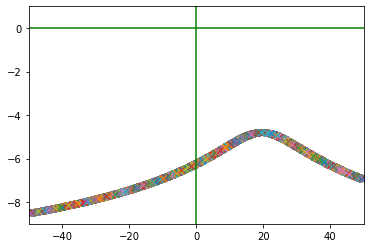

In [37]:
# 그래프 그리기
plt.plot(x,y,'x')
plt.xlim([-50,50]); plt.ylim([-9,1])
plt.axvline(x=0, c='g'); plt.axhline(y=0, c='g')
plt.show()

## Evaluation Result

### Training/Validation error

In [70]:
error = y - output_a
print(error)

[[8.88178420e-16 0.00000000e+00 0.00000000e+00 ... 8.88178420e-16
  1.77635684e-15 8.88178420e-16]]
